# Exercise/Example: the biggest Earthquake in the UK this Century

## The Problem

`GeoJSON` is a json-based file format for sharing geographic data. One example dataset is the USGS earthquake data:

In [1]:
import requests

quakes = requests.get(
    "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
    params={
        "starttime": "2000-01-01",
        "maxlatitude": "58.723",
        "minlatitude": "50.008",
        "maxlongitude": "1.67",
        "minlongitude": "-9.756",
        "minmagnitude": "1",
        "endtime": "2021-01-19",
        "orderby": "time-asc",
    },
)

In [2]:
quakes.text[0:100]

'{"type":"FeatureCollection","metadata":{"generated":1642601968000,"url":"https://earthquake.usgs.gov'

## Your exercise

Determine the **location** of the **largest magnitude** earthquake in the UK this century.

You can break this exercise down into several subtasks. You'll need to:
### Load the data
* Get the text of the web result
* Parse the data as JSON



In [19]:
import json

In [20]:
requests_json = json.loads(quakes.text)

In [21]:
type(requests_json)

dict

### Investigate the data
* Understand how the data is structured into dictionaries and lists
   * Where is the magnitude?
   * Where is the place description or coordinates?

In [15]:
requests_json.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [26]:
len(requests_json["features"])

128

In [27]:
requests_json["features"][0]

{'type': 'Feature',
 'properties': {'mag': 2.6,
  'place': '12 km NNW of Penrith, United Kingdom',
  'time': 956553055700,
  'updated': 1415322596133,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 104,
  'net': 'us',
  'code': 'p0009rst',
  'ids': ',usp0009rst,',
  'sources': ',us,',
  'types': ',impact-text,origin,phase-data,',
  'nst': None,
  'dmin': None,
  'rms': None,
  'gap': None,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 2.6 - 12 km NNW of Penrith, United Kingdom'},
 'geometry': {'type': 'Point', 'coordinates': [-2.81, 54.77, 14]},
 'id': 'usp0009rst'}

### Search through the data
* Program a search through all the quakes to find the biggest quake
* Find the place of the biggest quake

### Visualise your answer
* Form a URL for an online map service at that latitude and longitude: look back at the introductory example
* Display that image

In [29]:
requests_json["features"][0]["properties"]["mag"]

2.6

In [30]:
requests_json["features"][0]["geometry"]["coordinates"]

[-2.81, 54.77, 14]

In [31]:
df = requests_json["features"]

In [34]:
for i in df:
    i
    
print(i)

{'type': 'Feature', 'properties': {'mag': 3.1, 'place': '5 km N of Aylesbury, United Kingdom', 'time': 1600763534740, 'updated': 1606599124040, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000bzt0', 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000bzt0&format=geojson', 'felt': 18, 'cdi': 4.1, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 155, 'net': 'us', 'code': '6000bzt0', 'ids': ',us6000bzt0,', 'sources': ',us,', 'types': ',dyfi,origin,phase-data,', 'nst': None, 'dmin': 3.425, 'rms': 0.41, 'gap': 162, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 3.1 - 5 km N of Aylesbury, United Kingdom'}, 'geometry': {'type': 'Point', 'coordinates': [-0.8285, 51.8626, 10]}, 'id': 'us6000bzt0'}


In [36]:
largest = 0
for i in df:
    if i["properties"]["mag"] > largest:
        largest = i["properties"]["mag"]
        location = i["geometry"]["coordinates"]

print(largest)
print(location)

4.8
[-2.15, 52.52, 9.4]


In [41]:
for i in df:
    if i["properties"]["mag"] == largest:
        print(i["properties"]["place"])

2 km ESE of Wombourn, United Kingdom
1 km NNE of Market Rasen, United Kingdom


In [37]:
lat = location[1]
long = location[0]

In [38]:
import requests

def request_map_at(lat, long, satellite=True, zoom=10, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"

    params = dict(
        z=zoom,
        size="{},{}".format(size[0], size[1]),
        ll="{},{}".format(long, lat),
        l="sat" if satellite else "map",
        lang="en_US",
    )

    return requests.get(base, params=params)

map_png = request_map_at(lat, long, zoom=10, satellite=False)

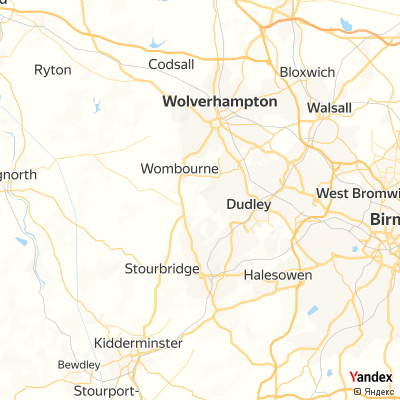

In [39]:
from IPython.display import Image

Image(map_png.content)